In [23]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
import tensorflow as tf
import os
import numpy as np
import random

def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


def convert_stringArrays_to_floatArray(array):
    intArray = []

    for k in array:
        if isfloat(k):
            intArray.append(float(k))
    return intArray



def readFromFile(path):
    with open(path, 'r') as content_file:
        content = content_file.read()
        return content


def buil_db(array, value):
    data_X = []
    data_Y = []
    n = len(array)
    for i in range(0, n):
        data_X.append(array[i])
        data_Y.append(value)

    return data_X, data_Y


def buildSmallerTrainDataSameFalseandTrue(xTrain, y_train, size):
    X = []
    y = []
    seen = []
    while len(seen) < size / 2:
        rand = random.randrange(0,len(xTrain))
        if rand not in seen and y_train[rand] == 0:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
    seen = []      
    while len(seen) < size / 2:
        rand = random.randrange(0,len(xTrain))
        if rand not in seen and y_train[rand] == 1:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
    return np.array(X), np.array(y)

def buildSmallerTrainData(xTrain, y_train, size):
    X = []
    y = []
    seen = []
    while len(seen) < size :
        rand = random.randrange(0,len(xTrain))
        if rand not in seen:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
    return np.array(X), np.array(y)

def buildSmallerTestingData(xTrain, y_train, size, interval):
    X = []
    y = []
    seen = []
    rand = interval
    while len(seen) < size / 2:
        if rand not in seen and y_train[rand] == 0:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
        rand += 1
            
    rand = interval
    seen = []      
    while len(seen) < size / 2:
        if rand not in seen and y_train[rand] == 1:
            X.append(xTrain[rand])
            y.append(y_train[rand])
            seen.append(rand)
            
        rand += 1
    return np.array(X), np.array(y)


def readpktHistDirectFromFile(path):
    X_data = []
    files = os.listdir(path)[0:5000]
    for f in files:
        if os.path.isfile(path + f):
            hist = convert_stringArrays_to_floatArray(readFromFile(path + f).split(" "))
            X_data.append(np.array(hist))
  
    return X_data

def readDataset(value,path):
    x_train, y_train = [], []
    dataset = readpktHistDirectFromFile(path = path)
    data_x, data_y = buil_db(dataset, value)
    x_train.extend(data_x)
    y_train.extend(data_y)

    return x_train, y_train

def read_train_test():
    trainin_dataset_X = []
    trainin_dataset_y = []
    X_test=[]
    y_test=[]
   
    
    names = ['httpMultipleTab/4', 'httpMultipleTab/2', 'httpMultipleTab/3', 'httpMultipleTab/1',
            'caida',
             'noisyBitMultipleTab/4', 'noisyBitMultipleTab/2', 'noisyBitMultipleTab/3',
             'noisyBitMultipleTab/1','bitcoin','bitcoinCaida']
    
    trueLablems = [1]
    labels = [0, 0, 0, 0,0, 1, 1, 1, 1, 1, 1, 1, 1]
    i = 0
    address = '/home/fatemeh/MyProjects/Bitcoin_Traffic_Analysis'
    for n in names:

        

        x_temp,y_temp = readDataset(path=address+'/jan 19/vlm_0remove/10s_2/train/' + n + "/"
                                               ,value=labels[i])
        trainin_dataset_X.extend(x_temp)
        trainin_dataset_y.extend(y_temp)

        x_temp2, y_temp2 = readDataset(path=address+'/jan 19/vlm_0remove/10s_2/test/' + n + "/"
                                              ,value=labels[i] )
        print("read data: ",n, len(x_temp), len(x_temp2))
       
        X_test.extend(x_temp2)
        y_test.extend(y_temp2)
        i += 1
    
 
    return (trainin_dataset_X,trainin_dataset_y), (X_test,y_test)

def read_train_test_2():
    trainin_dataset_X = []
    trainin_dataset_y = []
    X_test=[]
    y_test=[]
   
    
    names = ['http/1', 'http/2', 'http/3', 'http/4', 'http/5',
             'caida/1', 'caida/2', 'caida/3', 'caida/4', 'caida/5'
             ,'bitcoin_noisy/1', 'bitcoin_noisy/2',
             'bitcoin_noisy/3',
             'bitcoin_noisy/4', 'bitcoin_noisy/5',
             'bitcoin', 'bitcoin_caida/1'
             , 'bitcoin_caida/2','bitcoin_caida/3','bitcoin_caida/4', 'bitcoin_caida/5']#caida
#     names = ['caida/1','bitcoin_caida/1']
    
    trueLablems = [1]
#     labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
    i = 0
    address = '/home/fatemeh/MyProjects/Bitcoin_Traffic_Analysis/April-2020_2/'
    for n in names:

        if 'bitcoin' in n:
            label = 1
        else:
            label = 0

        x_temp,y_temp = readDataset(path = address + n + "/train/", value=label)
        trainin_dataset_X.extend(x_temp)
        trainin_dataset_y.extend(y_temp)

        x_temp2, y_temp2 = readDataset(path = address + n + "/test/", value=label)
        print("read data: ",n, len(x_temp), len(x_temp2))
       
        X_test.extend(x_temp2)
        y_test.extend(y_temp2)
        i += 1
    
 
    return (trainin_dataset_X, trainin_dataset_y), (X_test,y_test)

def y_pred_process(y_pred, threshold):
    output = []
    for y in y_pred:
        if y >= threshold:
            output.append(1)
        else:
            output.append(0)
    return output

In [64]:
import time 

begin = time.time()
(x_train, y_train), (x_test, y_test) = read_train_test_2()
XTrain_2, yTrain_2 = np.array(x_train), np.array(y_train)
xTest_2, yTest_2 = np.array(x_test), np.array(y_test) 
print("Time it took: ", time.time() - begin)

('read data: ', 'http/1', 5000, 2000)
('read data: ', 'http/2', 5000, 2000)
('read data: ', 'http/3', 5000, 2000)
('read data: ', 'http/4', 5000, 2000)
('read data: ', 'http/5', 5000, 2000)
('read data: ', 'caida/1', 5000, 2000)
('read data: ', 'caida/2', 5000, 2000)
('read data: ', 'caida/3', 5000, 2000)
('read data: ', 'caida/4', 5000, 2000)
('read data: ', 'caida/5', 5000, 2000)
('read data: ', 'bitcoin_noisy/1', 5000, 1677)
('read data: ', 'bitcoin_noisy/2', 5000, 1677)
('read data: ', 'bitcoin_noisy/3', 5000, 1677)
('read data: ', 'bitcoin_noisy/4', 5000, 1677)
('read data: ', 'bitcoin_noisy/5', 5000, 1677)
('read data: ', 'bitcoin', 5000, 1677)
('read data: ', 'bitcoin_caida/1', 5000, 1677)
('read data: ', 'bitcoin_caida/2', 5000, 1677)
('read data: ', 'bitcoin_caida/3', 5000, 1677)
('read data: ', 'bitcoin_caida/4', 5000, 1677)
('read data: ', 'bitcoin_caida/5', 5000, 1677)
('Time it took: ', 982.4488060474396)


In [ ]:
from keras.regularizers import l2
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers.core import Activation
from keras.utils import plot_model
from keras.layers import LeakyReLU, ReLU


def get_bitcoin_model():
    model = Sequential()

    model.add(Conv1D(32, 1, input_shape = (1, 60)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Flatten())

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

def get_NN_model(flow_size):
    
    model = Sequential()
    model.add(Conv1D(64, 1, activation = 'relu',input_shape=(1, flow_size)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    return model

def get_NN_model_3(flow_size):
    
    model = Sequential()
    model.add(Conv1D(512, 1, input_shape=(1, flow_size)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(128, 1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Conv1D(128, 1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    model.add(MaxPooling1D(pool_size=1))
    
    model.add(Flatten())
    
    model.add(Dense(16,kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    return model
'''
 
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10,kernel_regularizer=l2(reg), padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3_dec')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3_dec')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3_dec')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)

'''
def get_NN_model_2(flow_size):
    
    model = Sequential()
    model.add(Conv1D(128, 1, activation='relu', input_shape=(1, flow_size)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=1))
    
#     model.add(Conv1D(64, 1, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.25))
#     model.add(MaxPooling1D(pool_size=1))
    
#     model.add(Conv1D(64, 1, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.25))
#     model.add(MaxPooling1D(pool_size=1))
    
    model.add(Flatten())
    
    model.add(Dense(32,kernel_regularizer=l2(1e-5), bias_regularizer=l2(1e-5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [47]:
print(len(XTrain_2), sum(yTrain_2), yTrain_2[0], yTrain_2)

(105000, 55000, 0, array([0, 0, 0, ..., 1, 1, 1]))


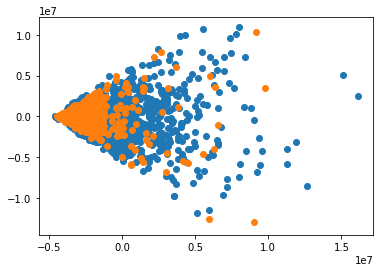

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca = pca.fit_transform(XTrain_2)

x = pca[:, 0]
y = pca[:, 1]

t = 800
neg = 50000
plt.scatter(x[:t], y[:t])
plt.scatter(x[-t:], y[-t:])
# plt.plot(x,y)
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

order = np.arange(XTrain_2.shape[0])
np.random.shuffle(order)

XT = XTrain_2[order]
yT = yTrain_2[order]

scaler = MinMaxScaler(feature_range = (0, 1))
XT = scaler.fit_transform(XT[:,:])
XT = np.expand_dims(XT, axis=1)

In [543]:
import keras
es = keras.callbacks.EarlyStopping(monitor='
                                   ', mode='max', min_delta=0, patience = 100,restore_best_weights=True)

In [ ]:
################################### FP < 0.001
('epochs: ', 100, 'n_train: ', 5000, 0.00085, 0.9969642760340435)
('Time it takes to fit: ', 494.4475519657135)

('epochs: ', 40, 'n_train: ', 10000, 0.0004, 0.9972353228167181)
('Time it takes to fit: ', 815.8287320137024)

('epochs: ', 20, 'n_train: ', 20000, 0.0, 0.9972353228167181)
('Time it takes to fit: ', 1131.6148400306702)

('epochs: ', 10, 'n_train: ', 40000, 0.0, 0.9972895321732531)
('Time it takes to fit: ', 1510.7011880874634)

################################## FP < 0.0001
('epochs: ', 490, 'n_train: ', 5000, 5e-05, 0.9955006234076001)
('Time it takes to fit: ', 1859.9479568004608)
('epochs: ', 50, 'n_train: ', 10000, 5e-05, 0.9970184853905785)
('Time it takes to fit: ', 2179.9475247859955)
('epochs: ', 20, 'n_train: ', 20000, 0.0, 0.9963137637556242)
('Time it takes to fit: ', 2457.3668417930603)
('epochs: ', 10, 'n_train: ', 40000, 0.0, 0.9966932292513688)
('Time it takes to fit: ', 2826.448084831238)

In [14]:
xTest2 = scaler.fit_transform(xTest_2)
xTest2 = np.expand_dims(xTest2, axis=1)

In [69]:
print(len(xTest2))

38447


In [80]:
scaler = MinMaxScaler(feature_range = (0, 1))
def shuffle_transform(X, y):
    
    order = np.arange(X.shape[0])
    np.random.shuffle(order)

    XT = X[order]
    yT = y[order]

    XT = scaler.fit_transform(XT)## train
    XT = np.expand_dims(XT, axis = 1)
    return XT, yT

In [81]:
xt, yt = shuffle_transform(xTest_2, yTest_2)


In [ ]:
import time
from numpy.random import seed
import random

seed(1)
random.seed(1)

# models = []
### smaller the architecture and use 600 feature insted of 1576
start = time.time()
for n in [40000]:
    model = get_NN_model(flow_size = 60)
    for i in range(2):
        history = model.fit(XT[:n,:,1:61], yT[:n], epochs = 25, batch_size = 512, verbose = 0, validation_split=0.3)
        if history.history['val_accuracy'][-1] > 0.9:
            
            y_pred = model.predict(xt[:10000,:,1:61])
            FP, TP, accur = compute_performace(y_true = yt[:10000], y_pred = y_pred)
            print('epochs: ', i * 10, "n_train: ", n, FP, TP, accur)
        
    end = time.time()
    print ("Time it takes to fit: ", end - start)
    models.append(model)

In [ ]:
('epochs: ', 70, 'n_train: ', 5000, 0.0028, 0.997343741529788, 0.9972689676697791)
('epochs: ', 80, 'n_train: ', 5000, 0.0034, 0.997343741529788, 0.9969568496891825)
('epochs: ', 90, 'n_train: ', 5000, 0.00135, 0.9971269041036482, 0.9979192134626889)
('Time it takes to fit: ', 372.6502311229706)
('epochs: ', 40, 'n_train: ', 10000, 0.0005, 0.997397950886323, 0.9984914297604495)
('epochs: ', 50, 'n_train: ', 10000, 0.00025, 0.997343741529788, 0.998595469087315)
('epochs: ', 60, 'n_train: ', 10000, 0.0002, 0.9972353228167181, 0.9985694592555986)
('epochs: ', 70, 'n_train: ', 10000, 0.0, 0.9971811134601832, 0.9986474887507478)
('epochs: ', 80, 'n_train: ', 10000, 5e-05, 0.9972353228167181, 0.9986474887507478)
('epochs: ', 90, 'n_train: ', 10000, 0.0, 0.9971811134601832, 0.9986474887507478)
('Time it takes to fit: ', 1109.226538181305)
('epochs: ', 10, 'n_train: ', 20000, 0.00085, 0.9976689976689976, 0.9984394100970166)
('epochs: ', 20, 'n_train: ', 20000, 0.0001, 0.9962053450425543, 0.99812729211642)
('epochs: ', 30, 'n_train: ', 20000, 5e-05, 0.9968016479644387, 0.9984394100970166)
('epochs: ', 40, 'n_train: ', 20000, 0.0, 0.9975605789559278, 0.9988295575727625)
('epochs: ', 50, 'n_train: ', 20000, 0.0, 0.9968016479644387, 0.9984654199287331)
('epochs: ', 60, 'n_train: ', 20000, 0.0, 0.9969100666775086, 0.9985174395921659)
('epochs: ', 70, 'n_train: ', 20000, 0.0, 0.9964763918252291, 0.9983093609384347)
('epochs: ', 80, 'n_train: ', 20000, 0.0, 0.9968016479644387, 0.9984654199287331)
('epochs: ', 90, 'n_train: ', 20000, 0.0, 0.997397950886323, 0.9987515280776134)
('Time it takes to fit: ', 2514.7833139896393)
('epochs: ', 20, 'n_train: ', 40000, 5e-05, 0.9964763918252291, 0.9982833511067183)
('epochs: ', 30, 'n_train: ', 40000, 0.0, 0.9967474386079037, 0.9984394100970166)
('epochs: ', 40, 'n_train: ', 40000, 0.0, 0.9968016479644387, 0.9984654199287331)
('epochs: ', 50, 'n_train: ', 40000, 0.0, 0.9968016479644387, 0.9984654199287331)
('epochs: ', 60, 'n_train: ', 40000, 0.0, 0.996530601181764, 0.9983353707701511)
('epochs: ', 70, 'n_train: ', 40000, 0.0, 0.9967474386079037, 0.9984394100970166)
('epochs: ', 80, 'n_train: ', 40000, 0.0, 0.9966390198948338, 0.9983873904335839)
('epochs: ', 90, 'n_train: ', 40000, 0.00045, 0.9971811134601832, 0.9984134002653002)
('Time it takes to fit: ', 4711.754940986633)

('epochs: ', 0, 'n_train: ', 1000, 0.96755, 1.0, 0.4966837464561604)
('epochs: ', 10, 'n_train: ', 1000, 0.9988, 1.0, 0.4804276016334174)
('epochs: ', 20, 'n_train: ', 1000, 1.0, 1.0, 0.4798033656722241)
('epochs: ', 30, 'n_train: ', 1000, 1.0, 1.0, 0.4798033656722241)
('epochs: ', 40, 'n_train: ', 1000, 1.0, 1.0, 0.4798033656722241)
('epochs: ', 50, 'n_train: ', 1000, 1.0, 1.0, 0.4798033656722241)
('epochs: ', 60, 'n_train: ', 1000, 0.99985, 1.0, 0.47988139516737327)
('epochs: ', 70, 'n_train: ', 1000, 0.9992, 1.0, 0.48021952297968634)
('epochs: ', 80, 'n_train: ', 1000, 0.9982, 1.0, 0.48073971961401407)
('epochs: ', 90, 'n_train: ', 1000, 0.9927, 1.0, 0.4836008011028169)
('Time it takes to fit: ', 278.3722507953644)

In [ ]:
('Result for: n_train  ', 10000, '  epochs:  ', 86)
('FP: ', 8.333333333333333e-05, 'TP: ', 0.9495, 'FN: ', 0.0505)
('Accuracy: ', 0.9727692307692307)

('Result for: n_train  ', 20000, '  epochs:  ', 69)
('FP: ', 0.0015833333333333333, 'TP: ', 0.9840714285714286, 'FN: ', 0.015928571428571427)
('Accuracy: ', 0.9906923076923076)


('Result for: n_train  ', 5000, '  epochs:  ', 50)
('FP: ', 0.34841666666666665, 'TP: ', 0.9997142857142857, 'FN: ', 0.00028571428571428574)
('Accuracy: ', 0.8390384615384615)


## early stopping
('Result for: n_train  ', 5000, '  epochs:  ', 174)
('FP: ', 0.0, 'TP: ', 0.8646428571428572, 'FN: ', 0.13535714285714287)
('Accuracy: ', 0.9271153846153846)

('Result for: n_train  ', 20000, '  epochs:  ', 123)
('FP: ', 0.0013333333333333333, 'TP: ', 0.9575, 'FN: ', 0.0425)
('Accuracy: ', 0.9765)

('Result for: n_train  ', 10000, '  epochs:  ', 200)
('FP: ', 0.007083333333333333, 'TP: ', 0.9967142857142857, 'FN: ', 0.003285714285714286)
('Accuracy: ', 0.9949615384615385)

In [519]:
############  check if model overfits with small train data  #########
y_pred = model.predict(XT[:n_train])
compute_performace(y_true = yT[:n_train], y_pred = y_pred)

('Result for: n_train  ', 10000, '  epochs:  ', 200)
('FP: ', 0.0, 'TP: ', 1.0, 'FN: ', 0.0)
('Accuracy: ', 1.0)


In [ ]:
('Result for: n_train  ', 1000, '  epochs:  ', 200)
('FP: ', 0.08666666666666667, 'TP: ', 0.9979285714285714, 'FN: ', 0.0020714285714285713)
('Accuracy: ', 0.9588846153846153)

('Result for: n_train  ', 5000, '  epochs:  ', 100)
('FP: ', 0.0003333333333333333, 'TP: ', 0.8710714285714286, 'FN: ', 0.12892857142857142)
('Accuracy: ', 0.9304230769230769)

('Result for: n_train  ', 5000, '  epochs:  ', 60)
('FP: ', 0.0019166666666666666, 'TP: ', 0.9580714285714286, 'FN: ', 0.041928571428571426)
('Accuracy: ', 0.9765384615384616)

('Result for: n_train  ', 10000, '  epochs:  ', 30)
('FP: ', 0.0015, 'TP: ', 0.9665, 'FN: ', 0.0335)
('Accuracy: ', 0.9812692307692308)

('Result for: n_train  ', 10000, '  epochs:  ', 28)
('FP: ', 0.0069166666666666664, 'TP: ', 0.9975714285714286, 'FN: ', 0.0024285714285714284)
('Accuracy: ', 0.9955)


('Result for: n_train  ', 20000, '  epochs:  ', 20)
('FP: ', 0.0004166666666666667, 'TP: ', 0.937, 'FN: ', 0.063)
('Accuracy: ', 0.9658846153846153)

('Result for: n_train  ', 20000, '  epochs:  ', 16)
('FP: ', 0.00075, 'TP: ', 0.935, 'FN: ', 0.065)
('Accuracy: ', 0.9646538461538462)

('Result for: n_train  ', 40000, '  epochs:  ', 7)
('FP: ', 0.003, 'TP: ', 0.9320714285714286, 'FN: ', 0.06792857142857144)
('Accuracy: ', 0.9620384615384615)

In [30]:
def compute_performace(y_true, y_pred):
    #yT = yTest
    y_pred_proc = y_pred_process(y_pred, 0.5)
    accur = 0
    true_pos = 0
    false_pos = 0
    number_of_all_one = sum(y_true)
    nZeros = len(y_true) - number_of_all_one
    false_neg = 0
    for v in range(len(y_pred)):
        if y_true[v] == 1 and y_pred_proc[v] == 1:
            accur += 1
            true_pos += 1
        if y_pred_proc[v] == 0 and y_true[v] == 0:
             accur += 1
        if y_pred_proc[v] == 1 and y_true[v] == 0:
            false_pos += 1
        if y_pred_proc[v] == 0 and y_true[v] == 1:
            false_neg += 1
            
    FP = false_pos/float(nZeros)
    TP = true_pos/float(number_of_all_one)
#     print("Result for: n_train  ", n_train, "  epochs:  ", epochs)
#     print("FP: ", FP, "TP: ", TP,"FN: " ,false_neg/float(number_of_all_one))
    accur /= float(len(y_pred))
#     print("Accuracy: ", accur)
    return FP, TP, accur

In [ ]:
('Result for: n_train  ', 1000, '  epochs:  ', 200)
('FP: ', 0.00075, 'TP: ', 0.7464285714285714, 'FN: ', 0.25357142857142856)
('Accuracy: ', 0.8631153846153846)

('Result for: n_train  ', 5000, '  epochs:  ', 100)
('FP: ', 0.0, 'TP: ', 0.7175, 'FN: ', 0.2825)
('Accuracy: ', 0.8478846153846153)
 
 ('Result for: n_train  ', 5000, '  epochs:  ', 200)
('FP: ', 0.00025, 'TP: ', 0.7956428571428571, 'FN: ', 0.20435714285714285)
('Accuracy: ', 0.8898461538461538)

('Result for: n_train  ', 10000, '  epochs:  ', 100)
('FP: ', 0.0003333333333333333, 'TP: ', 0.8057142857142857, 'FN: ', 0.19428571428571428)
('Accuracy: ', 0.8952307692307693)

('Result for: n_train  ', 10000, '  epochs:  ', 200)
('FP: ', 0.00025, 'TP: ', 0.9033571428571429, 'FN: ', 0.09664285714285714)
('Accuracy: ', 0.9478461538461539)

('Result for: n_train  ', 10000, '  epochs:  ', 250)
('FP: ', 8.333333333333333e-05, 'TP: ', 0.7854285714285715, 'FN: ', 0.21457142857142858)
('Accuracy: ', 0.884423076923077)

('Result for: n_train  ', 10000, '  epochs:  ', 300)
('FP: ', 8.333333333333333e-05, 'TP: ', 0.8006428571428571, 'FN: ', 0.19935714285714284)
('Accuracy: ', 0.8926153846153846)

'Result for: n_train  ', 20000, '  epochs:  ', 100)
('FP: ', 0.00016666666666666666, 'TP: ', 0.8861428571428571, 'FN: ', 0.11385714285714285)
('Accuracy: ', 0.9386153846153846)

('Result for: n_train  ', 20000, '  epochs:  ', 200)
('FP: ', 8.333333333333333e-05, 'TP: ', 0.8475714285714285, 'FN: ', 0.15242857142857144)
('Accuracy: ', 0.9178846153846154)

In [210]:
y_pred = model.predict(xTest2)
compute_performace(y_true = yTest, y_pred = y_pred)

('Result for: n_train  ', 5000, '  epochs:  ', 100)
('FP: ', 1.0, 'TP: ', 1.0, 'FN: ', 0.0)
('Accuracy: ', 0.5384615384615384)


('Result for: n_train  ', 5000, '  epochs:  ', 200)
('FP: ', 0.0, 'TP: ', 1.0, 'FN: ', 0.0)
('Accuracy: ', 1.0)


In [ ]:
5K and 200 epochs:
('FP: ', 0.0, 'TP: ', 0.6230714285714286, 'FN: ', 0.37692857142857145)
('Accuracy: ', 0.7970384615384616)
####
('FP: ', 0.00016666666666666666, 'TP: ', 0.7082857142857143, 'FN: ', 0.2917142857142857)
('Accuracy: ', 0.8428461538461538)

('Result for: n_train  ', 1000, '  epochs:  ', 200)
('FP: ', 0.0005, 'TP: ', 0.7599285714285714, 'FN: ', 0.24007142857142857)
('Accuracy: ', 0.8705)

('Result for: n_train  ', 500, '  epochs:  ', 200)
('FP: ', 0.010333333333333333, 'TP: ', 0.9623571428571429, 'FN: ', 0.037642857142857145)
('Accuracy: ', 0.9749615384615384)
('Result for: n_train  ', 500, '  epochs:  ', 400)
('FP: ', 0.00016666666666666666, 'TP: ', 0.7227142857142858, 'FN: ', 0.2772857142857143)
('Accuracy: ', 0.8506153846153847)

('Result for: n_train  ', 500, '  epochs:  ', 600)
('FP: ', 0.00025, 'TP: ', 0.7982142857142858, 'FN: ', 0.2017857142857143)
('Accuracy: ', 0.8912307692307693)

('Result for: n_train  ', 100, '  epochs:  ', 200)
('FP: ', 0.12933333333333333, 'TP: ', 0.9622142857142857, 'FN: ', 0.037785714285714284)
('Accuracy: ', 0.9199615384615385)

('Result for: n_train  ', 100, '  epochs:  ', 500)
('FP: ', 0.013833333333333333, 'TP: ', 0.7330714285714286, 'FN: ', 0.2669285714285714)
('Accuracy: ', 0.8498846153846153)

In [ ]:
20K and 100 epochs:
    
('FP: ', 0.0005, 'TP: ', 0.9097857142857143, 'FN: ', 0.09021428571428572)
('Accuracy: ', 0.9511923076923077)

200 epoch
('FP: ', 0.0009166666666666666, 'TP: ', 0.9868571428571429, 'FN: ', 0.013142857142857144)
('Accuracy: ', 0.9925)

500 epoch
('FP: ', 0.0010833333333333333, 'TP: ', 0.9925714285714285, 'FN: ', 0.0074285714285714285)
('Accuracy: ', 0.9955)
##################################################
40K 200 epoch
('FP: ', 0.07483333333333334, 'TP: ', 0.9982142857142857, 'FN: ', 0.0017857142857142857)
('Accuracy: ', 0.9645)
#####################################################################
10K 200 epoch
('FP: ', 0.0, 'TP: ', 0.8166428571428571, 'FN: ', 0.18335714285714286)
('Accuracy: ', 0.9012692307692308)
############################################################
5K 200 epoch
('FP: ', 0.0, 'TP: ', 0.5759285714285715, 'FN: ', 0.4240714285714286)
('Accuracy: ', 0.7716538461538461)
second run
('FP: ', 0.0008333333333333334, 'TP: ', 0.9694285714285714, 'FN: ', 0.030571428571428572)
('Accuracy: ', 0.9831538461538462)
third run
('FP: ', 0.0016666666666666668, 'TP: ', 0.9787857142857143, 'FN: ', 0.021214285714285713)
('Accuracy: ', 0.9878076923076923)
fourth run:
    ('FP: ', 0.0, 'TP: ', 0.7647142857142857, 'FN: ', 0.2352857142857143)
('Accuracy: ', 0.8733076923076923)
###################################################################
1K 200 epoch
('FP: ', 0.0, 'TP: ', 0.7758571428571429, 'FN: ', 0.22414285714285714)
('Accuracy: ', 0.8793076923076923)
second run
('FP: ', 8.333333333333333e-05, 'TP: ', 0.7765714285714286, 'FN: ', 0.22342857142857142)
('Accuracy: ', 0.8796538461538461)

In [ ]:
######################### feature selection: 21 April 2020
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression

test = SelectKBest(score_func = f_regression, k=100)
fit = test.fit(XTrain, yTrain)
features = fit.transform(XTrain)
train_features = np.expand_dims(features, axis=1)

features_t = train_features[order]
y_t  = yTrain[order]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import time

def write_to_json(model, number):
    model_json = model.to_json()
    with open("model_vlm_0remove_2_" + str(number) + ".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model_vlm_0remove_2_" + str(number) + ".h5")

print(len(XTrainCopy),len(xTestCopy))# 30
scaler = MinMaxScaler(feature_range = (0, 1))
xT, yT = buildSmallerTrainDataSameFalseandTrue(xTestCopy, yTestCopy, size = 10000)
xT = scaler.fit_transform(xT)
xT = np.expand_dims(xT, axis=1)

X, y = buildSmallerTrainDataSameFalseandTrue(XTrainCopy, yTrainCopy, size = 110000)
print("finished reading dataset")

X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=1)


In [ ]:
def load_encoder_by_slice(p, model_name):
    chunk = 10
    Input_ipd = Input(shape=(chunk, 1), name='input1')  # this is needed just for the decoding
    
    Input_key = Input(shape=(key_length,), name='input2')
    fingerprint_mult = Input(shape=(chunk,), name='input3')
    fingerprint_sub = Input(shape=(chunk,), name='input4')
    
    ipd = Flatten()(Input_ipd)
    key1 = Dense(32, name='key1')(Input_key)
    if p != 0:
        Input_ipd_pre = Input(shape=(chunk, ), name='ipd_delay' + str(p-1))
#         Input_ipd_pre = Flatten()(Input_ipd_pre)
        sliced_ipd = Concatenate(name = 'concat'+ str(p))([Input_ipd_pre, ipd])
    else:
        sliced_ipd = Concatenate(name = 'concat'+ str(p))([ipd, ipd])
        
    ipd1 = Dense(32, name = 'dense'+ str(p))(sliced_ipd)
    batch_2 = BatchNormalization(name = 'batch'+ str(p))(ipd1)
    relu_2 = Activation('relu', name = 'act'+ str(p))(batch_2)

    ipds_merged_all = Concatenate(name = 'concat_key_'+ str(p))([relu_2, key1])
    dense_enc1 = Dense(64, name = 'dense_enc1' + str(p))(ipds_merged_all)
    batch_2 = BatchNormalization(name = 'batch2_'+ str(p))(dense_enc1)
    relu_2 = Activation('relu', name = 'act2_'+ str(p))(batch_2)
    dense_drop_enc1 = Dropout(0.3, name = 'dense_drop_enc1' + str(p))(relu_2)
        
    x_fingerprint_sig = Dense(chunk, name = 'fingerprint_sig' + str(p), activation = 'sigmoid')(dense_drop_enc1)
    x_fingerprint_mult = Multiply(name = 'fingerprint_mult')([x_fingerprint_sig, fingerprint_mult])
    x_fingerprint = Add(name = 'ipd_delay')([x_fingerprint_mult, fingerprint_sub])
    

    x_fingerprint = Reshape((chunk, 1), name='fingerprint')(x_fingerprint)
    if p !=0:
        
        encoder_ins = [ Input_key, Input_ipd_pre, Input_ipd, fingerprint_mult, fingerprint_sub]
        model_encoder = Model(inputs = encoder_ins, outputs = [x_fingerprint])
    else:
        encoder_ins = [ Input_key, Input_ipd, fingerprint_mult, fingerprint_sub]
        model_encoder = Model(inputs = encoder_ins, outputs = [x_fingerprint])
        
    model_encoder.load_weights(filepath = path + model_name + ".h5", by_name=True)
    return model_encoder
  
def load_decoder(key_length, sample_size, model_name):
    Input_ipd = Input(shape=(sample_size, 1), name='input1') 
    
    cconv_dec_2 = Conv1D(filters = 20, kernel_size=10, padding='same', name='conv_dec_2')(Input_ipd)
    conv_batch_2 = BatchNormalization(name='conv_batch_2')(conv_dec_2)
    conv_relu_2 = Activation('relu', name='conv_relu_2')(conv_batch_2)
    conv_drop_2 = Dropout(0.3, name='conv_drop_2')(conv_relu_2)
    max_pool_dec_2 = MaxPooling1D(pool_size=1, name="max_pool_dec_2")(conv_drop_2)
    
    conv_dec_3 = Conv1D(filters = 10, kernel_size=10, padding='same', name='conv_dec_3')(max_pool_dec_2)
    conv_batch_3 = BatchNormalization(name='conv_batch_3')(conv_dec_3)
    conv_relu_3 = Activation('relu', name='conv_relu_3')(conv_batch_3)
    conv_drop_2 = Dropout(0.3, name='conv_drop_3')(conv_relu_3)
    max_pool_dec_3 = MaxPooling1D(pool_size=1, name="max_pool_dec_3")(conv_drop_2)
    max_pool_dec_3_f = Flatten(name ="flate_max3")(max_pool_dec_3)

    dense_dec_1 = Dense(256, name='dense_dec_1')(max_pool_dec_3_f)
    dense_batch_dec1 = BatchNormalization(name='dense_batch_dec1')(dense_dec_1)
    dense_relu_dec1 = Activation('relu', name='dense_relu_dec1')(dense_batch_dec1)
    dense_drop_dec1 = Dropout(0.3, name='dense_drop_dec1')(dense_relu_dec1)    
    
    dense_dec_2 = Dense(64, name='dense_dec_2')(dense_drop_dec1)
    dense_batch_dec2 = BatchNormalization(name='dense_batch_dec2')(dense_dec_2)
    dense_relu_dec2 = Activation('relu', name='dense_relu_dec2')(dense_batch_dec2)
    dense_drop_dec2 = Dropout(0.3, name='dense_drop_dec2')(dense_relu_dec2)
    
    key_hat = Dense(key_length, activation='softmax', name='key_hat')(dense_drop_dec2)
    
    
    model_decoder = Model(inputs=[Input_ipd], outputs=[key_hat])
    model_decoder.load_weights(filepath=path + model_name + ".h5", by_name=True)

    return model_decoder


In [ ]:

def get_Dense_NN_model():
    model = Sequential()
    
    model.add(Flatten(input_shape=(1, 60)))
      
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))#it was sigmoid before: jan 21, 2019

    model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
    
    return model

def get_RR_NN_model():
    model = Sequential()    
    model.add(LSTM(256,input_shape=(1, 600)))

    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
test_features = fit.transform(xTest)
test_features = np.expand_dims(test_features, axis=1)
y_pred = model2.predict(test_features)
compute_performace(y_true = yTest, y_pred =y_pred)

In [ ]:
X, y = buildSmallerTrainDataSameFalseandTrue(XTrainCopy, yTrainCopy, size = 500)

X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=1)

In [73]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV

def gridSearch():
    seed = 7
    np.random.seed(seed)
    # load pima indians dataset
    # create model
    model = get_Dense_NN_model()

    model = KerasClassifier(build_fn=model, epochs=150,verbose=1)
    
    # grid search epochs, batch size and optimizer
    optimizers = ['rmsprop', 'adam']
#     init = ['glorot_uniform', 'normal', 'uniform']
    epochs = [50, 100, 150]
    batches = [5, 10, 20]
    param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
    
    tuned_parameters = [
        {'optimizer': ['adam'], 'batch_size': [5, 10, 20],
         'epoch': [50, 100, 200]}
       

    ]
    grid = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=5)
    grid_result = grid.fit(X, y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
gridSearch()
    

ValueError: optimizer is not a legal parameter